In [1]:
import numpy as np
import matplotlib.pyplot as plt
from VQE import VQE
from GroupingAlgorithm import *
from utils import *
# Importing standard Qiskit libraries
from qiskit import IBMQ, QuantumCircuit
from qiskit.providers.aer import AerSimulator
from qiskit.circuit.library import EfficientSU2
from qiskit.utils.quantum_instance import QuantumInstance
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter
from qiskit.algorithms.optimizers import SPSA
from IPython.display import display, clear_output

In [2]:
IBMQ.load_account()
provider      = IBMQ.get_provider(hub='ibm-q-csic', group='internal', project='iff-csic') 
backend_paris = provider.get_backend('ibmq_paris')
WC_paris      = get_backend_conectivity(backend_paris)
backend_sim   = AerSimulator(method="statevector") # Backend for simulation
backend_noise = AerSimulator.from_backend(backend_paris)
NUM_SHOTS = 2**13  # Number of shots for each circuit

In [3]:
qubit_op, init_state = LiH(initial_state=True)
num_qubits = qubit_op.num_qubits

In [4]:
qubit_op = BeH2(initial_state=False)
num_qubits = qubit_op.num_qubits

In [5]:
num_qubits

7

In [6]:
from qiskit.opflow.primitive_ops import Z2Symmetries
f = Z2Symmetries.find_Z2_symmetries( qubit_op )
print(f)

Z2 symmetries:
Symmetries:
Single-Qubit Pauli X:
Cliffords:
Qubit index:
[]
Tapering values:
  - Possible values: []


In [6]:
num_qubits = 2
qubit_op = RandomHamiltonian( num_qubits, 6 )
init_state = QuantumCircuit(num_qubits)
print( qubit_op )

SummedOp([
  XY,
  IY,
  YY,
  XI,
  YZ,
  YY
])


In [7]:
result_exact = NumPyMinimumEigensolver().compute_minimum_eigenvalue(qubit_op)
result_exact.eigenvalue 

(-3.236067977499788+9.932513327892889e-17j)

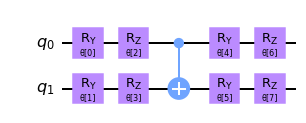

In [8]:
entangled_layer = []
for qbs in WC_paris :
    if qbs[0]<qbs[1] and qbs[1]<num_qubits :
        entangled_layer.append(qbs)

ansatz = init_state.compose( EfficientSU2(num_qubits,['ry','rz'], entanglement=entangled_layer, reps=1 ) )
ansatz.draw(output='mpl')

In [9]:
def callback( evals, params ):  
    display("{}, {}".format(len(evaluations),evals))
    clear_output(wait=True)
    parameters.append(params)
    evaluations.append(evals)

parameters  = []
evaluations = []

In [10]:
optimizer = SPSA( maxiter=100, last_avg=1 )

In [11]:
num_var = ansatz.num_parameters
pars = [0.01] * num_var

In [12]:
result_exact.eigenvalue 

(-3.236067977499788+9.932513327892889e-17j)

In [13]:
solver = VQE( ansatz, optimizer, pars, grouping = 'Entangled' )
results = solver.compute_minimum_eigenvalue(qubit_op)
print( results.eigenvalue )

-3.208984375


In [14]:
solver = VQE( ansatz, optimizer, pars, grouping = 'TPB' )
results = solver.compute_minimum_eigenvalue(qubit_op)
print( results.eigenvalue )

-2.61328125


In [15]:
solver = VQE( ansatz, optimizer, pars, grouping = 'Entangled', conectivity = WC_paris )
results = solver.compute_minimum_eigenvalue(qubit_op)
print( results.eigenvalue )

-2.9140625


In [16]:
parameters  = []
evaluations = []
solver = VQE( ansatz, optimizer, pars, grouping = 'Entangled', callback=callback )
results = solver.compute_minimum_eigenvalue(qubit_op)
print( results.eigenvalue )

-2.7734375


In [17]:
# parameters  = []
# evaluations = []
# optimizer   = SPSA( maxiter=50, last_avg=1 )
# solver = VQE( ansatz, optimizer, pars, grouping = 'Entangled', callback=callback, quantum_instance=backend_noise )
# results = solver.compute_minimum_eigenvalue(qubit_op)
# print( results.eigenvalue )

In [18]:
# plt.plot( evaluations )

In [19]:
qi = QuantumInstance( backend_sim, shots = NUM_SHOTS )
parameters  = []
evaluations = []
optimizer   = SPSA( maxiter=50, last_avg=1 )
solver = VQE( ansatz, optimizer, pars, grouping = 'Entangled', quantum_instance=qi )
results = solver.compute_minimum_eigenvalue(qubit_op)
print( results.eigenvalue )

-2.312744140625


In [36]:
print(results)

OrderedDict([   ('aux_operator_eigenvalues', None),
                ('cost_function_evals', 100),
                (   'eigenstate',
                    {   '00': 0.2962575816540397,
                        '01': 0.5924121440665274,
                        '10': 0.739097184704082,
                        '11': 0.12253427454186033}),
                ('eigenvalue', -2.312744140625),
                (   'optimal_parameters',
                    {   ParameterVectorElement(θ[4]): 2.6446918008745772,
                        ParameterVectorElement(θ[5]): 0.09846894730926968,
                        ParameterVectorElement(θ[3]): -0.3318285134412358,
                        ParameterVectorElement(θ[2]): -0.10047417966520635,
                        ParameterVectorElement(θ[1]): -0.3052918833340054,
                        ParameterVectorElement(θ[0]): 1.7450594827938664,
                        ParameterVectorElement(θ[6]): 0.47874443743592804,
                        ParameterVectorElement(θ[7]

In [20]:
solver.ansatz

In [21]:
solver.cleanup_parameterized_circuits

<bound method VariationalAlgorithm.cleanup_parameterized_circuits of <VQE.VQE object at 0x000001AB333FD708>>

In [35]:
solver.construct_expectation( pars, qubit_op )[0].draw()

┌──────────┐┌──────────┐     ┌──────────┐┌──────────┐       ┌─┐     »
q24180_0: ┤ RY(θ[0]) ├┤ RZ(θ[2]) ├──■──┤ RY(θ[4]) ├┤ RZ(θ[6]) ├───────┤M├─────»
          ├──────────┤├──────────┤┌─┴─┐├──────────┤├──────────┤┌─────┐└╥┘┌───┐»
q24180_1: ┤ RY(θ[1]) ├┤ RZ(θ[3]) ├┤ X ├┤ RY(θ[5]) ├┤ RZ(θ[7]) ├┤ SDG ├─╫─┤ H ├»
          └──────────┘└──────────┘└───┘└──────────┘└──────────┘└─────┘ ║ └───┘»
   c36: 1/═════════════════════════════════════════════════════════════╬══════»
                                                                       ║      »
   c37: 1/═════════════════════════════════════════════════════════════╩══════»
                                                                       0      »
«             
«q24180_0: ───
«          ┌─┐
«q24180_1: ┤M├
«          └╥┘
«   c36: 1/═╩═
«           0 
«   c37: 1/═══
«

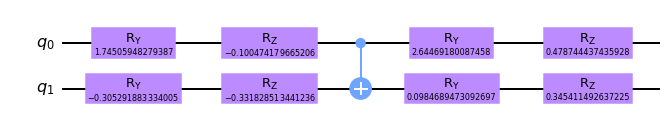

In [23]:
solver.get_optimal_circuit().draw(output='mpl')

In [24]:
solver.get_optimal_cost()

-2.312744140625

In [25]:
solver.get_optimal_vector()

{'01': 0.5808634467325345,
 '10': 0.7454287776172852,
 '11': 0.1283724744152733,
 '00': 0.30075588367062744}

In [26]:
# solver.get_prob_vector_for_params()

In [27]:
# solver.get_probabilities_for_counts()

In [28]:
solver.initial_point

[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

In [29]:
solver.optimal_params

array([ 1.74505948, -0.30529188, -0.10047418, -0.33182851,  2.6446918 ,
        0.09846895,  0.47874444,  0.34541149])

In [30]:
solver.optimizer

In [31]:
solver.quantum_instance

In [32]:
solver.supports_aux_operators()

False

In [33]:
print( solver.print_settings() )


==================== Setting of VQE ============================
Algorithm: VQE
-- ansatz_params: [ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7])]
-- ansatz:      ┌──────────┐┌──────────┐     ┌──────────┐┌──────────┐
q_0: ┤ RY(θ[0]) ├┤ RZ(θ[2]) ├──■──┤ RY(θ[4]) ├┤ RZ(θ[6]) ├
     ├──────────┤├──────────┤┌─┴─┐├──────────┤├──────────┤
q_1: ┤ RY(θ[1]) ├┤ RZ(θ[3]) ├┤ X ├┤ RY(θ[5]) ├┤ RZ(θ[7]) ├
     └──────────┘└──────────┘└───┘└──────────┘└──────────┘
-- quantum_instance: 
Qiskit Terra version: 0.17.0
Backend: 'aer_simulator_statevector (None)', with following setting:
{'basis_gates': ['ccx', 'cp', 'cswap', 'csx', 'cu1', 'cu2', 'cu3', 'cx', 'cy', 'cz', 'delay', 'diagonal', 'h', 'id', 'initialize', 'mcphase', 'mcr', 'mcrx', 'mcry', 'mcrz', 'mcswap', 'mcsx', 'mcu1', 'mcu2', 'mcu3', 'mcx', 'mcx_gray', 